In [90]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

from scipy.stats import bradford

%matplotlib inline

## [A Bradford continuous random variable](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bradford.html#scipy.stats.bradford)

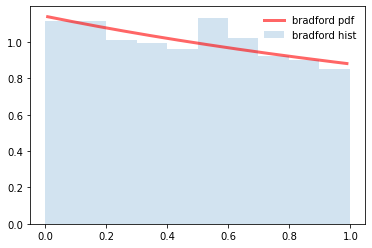

In [91]:
# Гистограмма выборки и теоретическая плотность распределения

fig, ax = plt.subplots(1, 1)

c = 0.299

# Среднее и дисперсия распределения
mean, var = bradford.stats(c)

# График ф-ции теоретической плотности
x = np.linspace(bradford.ppf(0.01, c), bradford.ppf(0.99, c), 1000)
ax.plot(x, bradford.pdf(x, c),'r-', lw=3, alpha=0.6, label='bradford pdf')


# Гистограмма выборки объема 1000
r = bradford.rvs(c, size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, label='bradford hist')
ax.legend(loc='best', frameon=False)
plt.show()

In [92]:
# Ф-ция построения графиков для сравнения распределений выборочного среднего и приближений
def draw_distr_n(n):
    """
    Ф-ция построения графиков для сравнения распределений выборочного среднего и приближений.
    
    Parameters
    ----------
    n : int
        Объем выборки
    """

    fig, ax = plt.subplots(1, 1)

    # 1000 выборок объёма n
    mean_n = np.fromiter((bradford.rvs(c, size=n).mean() for x in range(1000)), float)

    # Гистограмма распределения выборочных средних
    ax.hist(mean_n, density=True, histtype='stepfilled', alpha=0.2, label='bradford avg size='+str(n))
    ax.legend(loc='best', frameon=False)

    # Параметры выборочных средних
    mean_n = mean
    sigma_n = math.sqrt(var / n)
    
    # Нормальное распределение для приближения и его график его ф-ции плотности
    norm_rv_n = sts.norm(mean_n, sigma_n)
    x_n = np.linspace(0,1,100)
    pdf_n = norm_rv_n.pdf(x_n)
    plt.plot(x_n, pdf_n, label='norm pdf', alpha=0.5)

    plt.legend()
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    ax.plot
    plt.show()

### Оценка распределения выборочного среднего случайной величины при разных объёмах выборок.

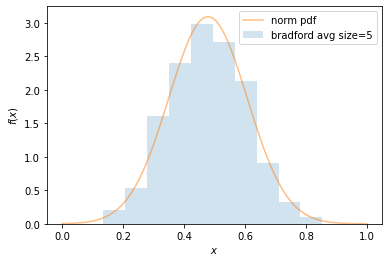

In [93]:
# Оценка для выборок объема 5
draw_distr_n(5)

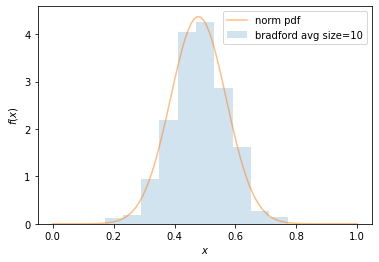

In [94]:
# Оценка для выборок объема 10
draw_distr_n(10)

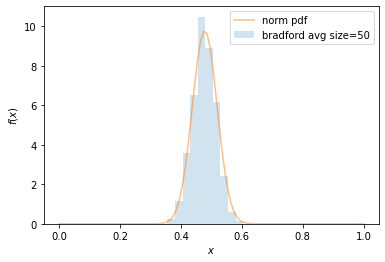

In [95]:
# Оценка для выборок объема 50
draw_distr_n(50)

## Вывод

С увеличением объема выборки возрастает точность аппроксимации выборочных средних.